## Данные

Данные -  https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps
Необходимо предсказать рейтинг приложения

In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: AppleStore.csv          
  inflating: appleStore_description.csv  


In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [110]:
data = pd.read_csv('./AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [111]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [112]:
data = data[cols]
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

<ipython-input-112-cf1716ff30d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)


,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5


In [113]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [114]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

currency DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [115]:
data = data.drop(columns=['currency'])
cat_cols.remove('currency')

array([[<Axes: title={'center': 'size_bytes'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'rating_count_tot'}>],
       [<Axes: title={'center': 'rating_count_ver'}>,
        <Axes: title={'center': 'sup_devices.num'}>,
        <Axes: title={'center': 'ipadSc_urls.num'}>],
       [<Axes: title={'center': 'lang.num'}>,
        <Axes: title={'center': 'cont_rating'}>,
        <Axes: title={'center': 'user_rating'}>]], dtype=object)

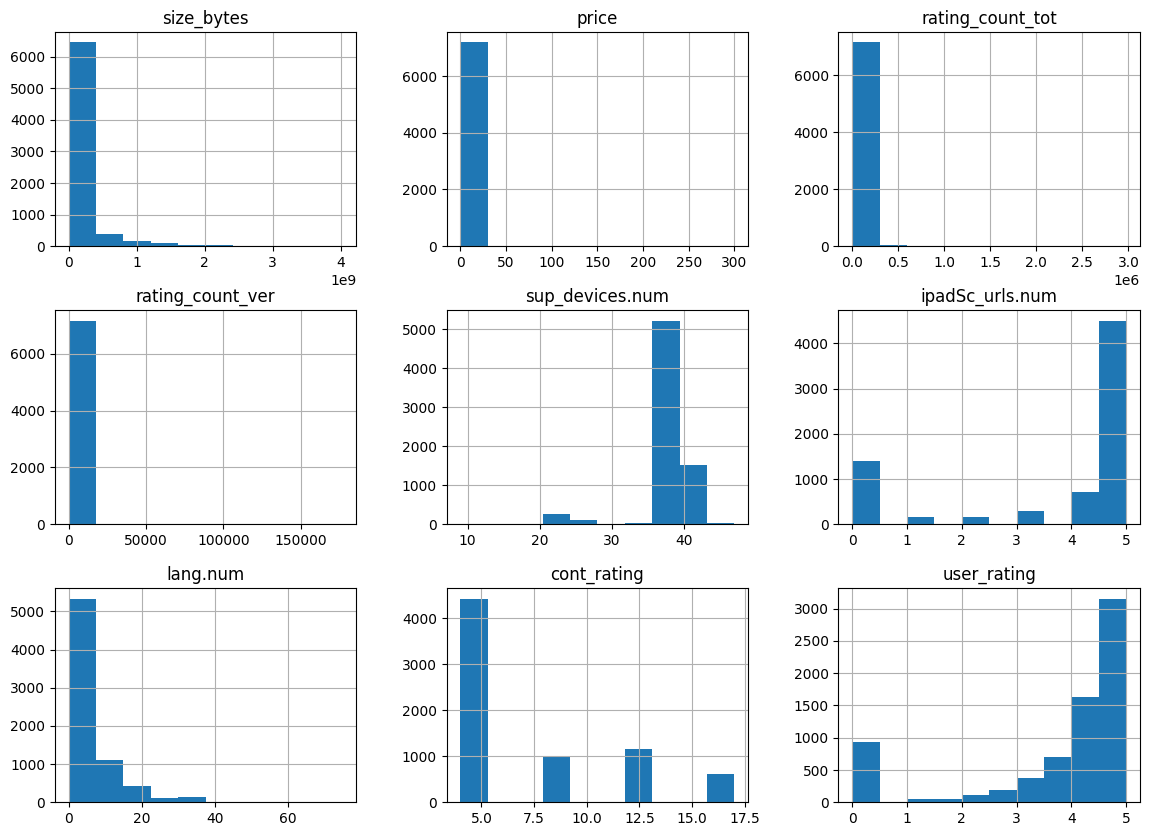

In [116]:
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))

In [117]:
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,user_rating,is_free
0,100788224,3.99,21292,26,38,5,10,4,Games,4.0,False
1,158578688,0.00,161065,26,37,5,23,4,Productivity,4.0,True
2,100524032,0.00,188583,2822,37,5,3,4,Weather,3.5,True
3,128512000,0.00,262241,649,37,5,9,12,Shopping,4.0,True
4,92774400,0.00,985920,5320,37,5,45,4,Reference,4.5,True


In [118]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a

,categorical
0,a
1,b
2,a
3,c


In [119]:
pd.get_dummies(a)

,categorical_a,categorical_b,categorical_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1


In [85]:
# Задание:
# добавьте в датафрейм колонки для всех категориальных фичей и обновите список категориальных фичей


In [120]:
# TO DO
cat_data = dict()
for cat_col in cat_cols:
  cat_data[cat_col] = data[cat_col].values
cat_df = pd.get_dummies(pd.DataFrame.from_dict(cat_data))
cat_df.head()

,is_free,prime_genre_Book,prime_genre_Business,prime_genre_Catalogs,prime_genre_Education,prime_genre_Entertainment,prime_genre_Finance,prime_genre_Food & Drink,prime_genre_Games,prime_genre_Health & Fitness,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,False,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,True,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,True,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [121]:
cat_df = cat_df.drop(["is_free"], axis=1)
data = data.join(cat_df)

In [126]:
data = data.drop(["prime_genre"], axis=1)
data

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating,is_free,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,100788224,3.99,21292,26,38,5,10,4,4.0,False,...,0,0,0,0,0,0,0,0,0,0
1,158578688,0.00,161065,26,37,5,23,4,4.0,True,...,0,0,1,0,0,0,0,0,0,0
2,100524032,0.00,188583,2822,37,5,3,4,3.5,True,...,0,0,0,0,0,0,0,0,0,1
3,128512000,0.00,262241,649,37,5,9,12,4.0,True,...,0,0,0,0,1,0,0,0,0,0
4,92774400,0.00,985920,5320,37,5,45,4,4.5,True,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,126644224,0.00,142,75,38,5,1,4,4.5,True,...,0,0,0,0,0,0,0,0,0,0
7193,120760320,0.00,30,30,38,0,1,4,4.5,True,...,0,0,0,0,0,0,0,0,0,0
7194,111322112,1.99,15,0,37,1,1,9,4.5,False,...,0,0,0,0,0,0,0,0,1,0
7195,97235968,0.00,85,32,38,0,2,12,4.5,True,...,0,0,0,0,0,0,0,0,0,0


In [123]:
cat_cols.extend(cat_df.columns)
cat_cols = set(cat_cols)
cat_cols

{'is_free',
 'prime_genre',
 'prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather'}

In [128]:
cat_cols = list(cat_cols)
cat_cols.remove("prime_genre")

### Масштабирование признаков


StandardScaler во время .fit() для каждого признака $x_i$ считает среднее $\mu_i$ и стандартное отклонение $\sigma_i$ на обучающем датасете. Во время .transform() к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - \mu_i}{\sigma_i}$$


MinMaxScaler во время .fit() для каждого признака $x_i$ считает минимум $x_{i, \text{min}}$ и максимум $x_{i, \text{max}}$ на обучающем датасете. Во время .transform() к каждому признаку применяется:

$$\mathbf{x_i}^{\text{new}} = \frac{\mathbf{x_i} - x_{i, \text{min}}}{x_{i, \text{max}} - x_{i, \text{min}}}$$

In [129]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])
X = pca.transform(data[num_cols + cat_cols])

## Разделение на train/test



In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

## Обучение


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [133]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [134]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -5.341951150010639
MSE: 1.9814417988997064


In [135]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)

R^2: -1.0448683189654164
MSE: 2.088694444444444


## Cross Validation


In [136]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [137]:
cross_validate(LinearRegression(), X, data[target_col], cv=5,
               scoring={'r2_score': make_scorer(r2_score),
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.0150795 , 0.01177812, 0.01144743, 0.01111746, 0.0134325 ]),
 'score_time': array([0.00178576, 0.00163341, 0.00160456, 0.00210905, 0.00162125]),
 'test_r2_score': array([-0.83069535,  0.06642508,  0.11575306,  0.10999384,  0.0710727 ]),
 'test_mean_squared_error': array([1.66588686, 1.48725011, 1.940372  , 2.81732166, 2.93200232])}

In [138]:
cross_validate(KNeighborsRegressor(), X, data[target_col], cv=5,
               scoring={'r2_score': make_scorer(r2_score, ),
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.00338793, 0.00270653, 0.00282121, 0.00309396, 0.00288701]),
 'score_time': array([0.06172228, 0.06636024, 0.05548477, 0.04833388, 0.04874349]),
 'test_r2_score': array([-0.57706574, -0.00693949,  0.02848263,  0.19118207,  0.08476091]),
 'test_mean_squared_error': array([1.43509028, 1.604125  , 2.1318763 , 2.56031967, 2.88879778])}

## GridSearchCV

In [139]:
from sklearn.model_selection import GridSearchCV

In [141]:
gbr_grid_search = GridSearchCV(KNeighborsRegressor(),
                               [{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
                               cv=5,
                               verbose=10)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START n_neighbors=1...............................................
[CV 1/5; 1/8] END ...............n_neighbors=1;, score=-0.391 total time=   0.1s
[CV 2/5; 1/8] START n_neighbors=1...............................................
[CV 2/5; 1/8] END ...............n_neighbors=1;, score=-0.297 total time=   0.2s
[CV 3/5; 1/8] START n_neighbors=1...............................................
[CV 3/5; 1/8] END ...............n_neighbors=1;, score=-0.290 total time=   0.1s
[CV 4/5; 1/8] START n_neighbors=1...............................................
[CV 4/5; 1/8] END ...............n_neighbors=1;, score=-0.393 total time=   0.2s
[CV 5/5; 1/8] START n_neighbors=1...............................................
[CV 5/5; 1/8] END ...............n_neighbors=1;, score=-0.202 total time=   0.1s
[CV 1/5; 2/8] START n_neighbors=2...............................................
[CV 1/5; 2/8] END ...............n_neighbors=2;, 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15]}],
             verbose=10)

In [142]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'n_neighbors': 8}
0.18569341791007438
KNeighborsRegressor(n_neighbors=8)


In [ ]:
# Задание: Убучите несколько других моделей и получите лучшие скоры

In [ ]:
# TO DO

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'n_estimators' : [100,500,],
              'max_depth'    : [4,6]}
grid_GBR = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 2, verbose=10)
grid_GBR.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START learning_rate=0.01, max_depth=4, n_estimators=100..........
[CV 1/2; 1/16] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.708 total time=   0.7s
[CV 2/2; 1/16] START learning_rate=0.01, max_depth=4, n_estimators=100..........
[CV 2/2; 1/16] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.726 total time=   0.7s
[CV 1/2; 2/16] START learning_rate=0.01, max_depth=4, n_estimators=500..........
[CV 1/2; 2/16] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.822 total time=   3.2s
[CV 2/2; 2/16] START learning_rate=0.01, max_depth=4, n_estimators=500..........
[CV 2/2; 2/16] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.844 total time=   3.2s
[CV 1/2; 3/16] START learning_rate=0.01, max_depth=6, n_estimators=100..........
[CV 1/2; 3/16] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.710 total time=   0.9s
[CV 2/2; 3/16] START lea

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6], 'n_estimators': [100, 500]},
             verbose=10)

In [159]:
print(grid_GBR.best_params_)
print(grid_GBR.best_score_)
print(grid_GBR.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
0.8331439637158822
GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)


In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

y_fix = preprocessing.LabelEncoder().fit_transform(y_train)
grid_logistic = GridSearchCV(LogisticRegression(), {'penalty': ['none', 'l2'], 'C': [0.01, 0.1, 1, 10]})
grid_logistic.fit(X_train, y_fix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['none', 'l2']})

In [171]:
print(grid_logistic.best_params_)
print(grid_logistic.best_score_)
print(grid_logistic.best_estimator_)

{'C': 0.01, 'penalty': 'none'}
0.4335577758470895
LogisticRegression(C=0.01, penalty='none')


In [172]:
from sklearn.svm import LinearSVC
from sklearn import preprocessing

y_fix = preprocessing.LabelEncoder().fit_transform(y_train)
grid_SVC = GridSearchCV(LinearSVC(), {'loss': ['hinge', 'squared_hinge'], 'C': [0.01, 0.1, 1, 10]})
grid_SVC.fit(X_train, y_fix)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'squared_hinge']})

In [173]:
print(grid_SVC.best_params_)
print(grid_SVC.best_score_)
print(grid_SVC.best_estimator_)

{'C': 0.1, 'loss': 'hinge'}
0.4167149338739261
LinearSVC(C=0.1, loss='hinge')
